$$
\begin{split}
& \underline{\text{Summary: Complex Conjugate Roots}} \\ \\
& \quad \Rightarrow \quad f(z) = 1 + 2|{\rho}|\bigg(\frac{\Gamma_{\operatorname{Re}}}{\Gamma}\bigg)z^{-1} + |{\rho}|^{2}z^{-2} \\ \\ \\
& \quad \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big| = 2|\rho|\sqrt{\Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2}} \space, \quad \text{where} \\ \\
& \quad \quad \quad \quad \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \space, \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] \\ \\ \\
&  \quad \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = -\tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\bigg[\Big(\frac{\Gamma_{\operatorname{Re}}}{|{\rho}|\Gamma}\Big) + \cos\big(\omega\big)\bigg]}{2\bigg[\cos\big(\omega\big) + \Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)\bigg]^{2} - 2\Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)^{2} + |{\rho}|^{-2} - 1}\end{pmatrix}
\\ \\ \\
\end{split}
$$

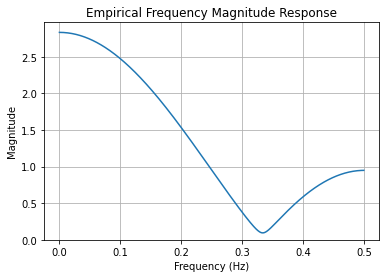

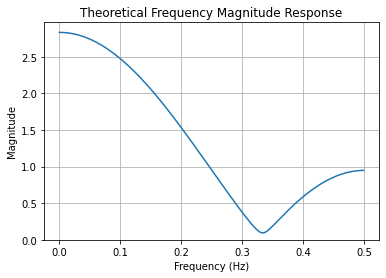

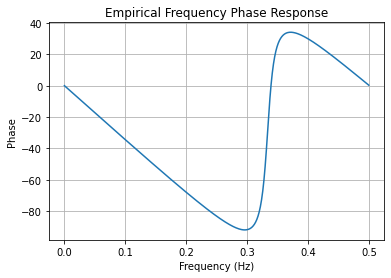

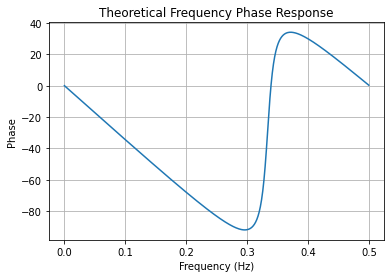

In [4]:
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt


def plotTheoAndEmp(freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg):

  plt.figure()
  plt.plot(freq, h_emp_abs)
  plt.ylim(bottom=0)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Empirical Frequency Magnitude Response')

  plt.figure()
  plt.plot(freq, h_theo_mag)
  plt.ylim(bottom=0)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Theoretical Frequency Magnitude Response')

  plt.figure()
  plt.plot(freq, h_emp_phase_deg)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase')
  plt.title('Empirical Frequency Phase Response')

  plt.figure()
  plt.plot(freq, h_theo_phase_deg)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase')
  plt.title('Theoretical Frequency Phase Response')


def calculateTheoAndEmp(Gamma_real, Gamma_imag_abs, withinUnitCircle):

  Gamma_real_squared = np.square(Gamma_real)
  Gamma_imag_squared = np.square(Gamma_imag_abs)

  if(withinUnitCircle):
    rho_abs_power = -1
  else:
    rho_abs_power = 1

  eta = 0.5*(Gamma_real_squared + Gamma_imag_squared + 1)
  Gamma = np.sqrt(eta + np.sqrt(np.square(eta) - Gamma_real_squared))
  rho_abs = np.power(Gamma + np.sqrt(np.square(Gamma) - 1), rho_abs_power)

  [omega, h_emp] = dsp.freqz([1, 2*rho_abs*Gamma_real/Gamma, np.square(rho_abs)])
  h_emp_abs = np.abs(h_emp)
  h_emp_phase_deg = np.rad2deg(np.angle(h_emp))

  h_theo_mag = 2*rho_abs*np.sqrt(np.square(np.cos(omega) + Gamma_real) + Gamma_imag_squared)
  arctan_num = 2*np.sin(omega)*(np.cos(omega) + (Gamma_real/(rho_abs*Gamma)))
  arctan_den = 2*np.square(np.cos(omega) + (Gamma_real/(2*rho_abs*Gamma))) - 2*np.square(Gamma_real/(2*rho_abs*Gamma)) + (1/np.square(rho_abs)) - 1
  h_theo_phase_deg = -np.rad2deg(np.arctan2(arctan_num, arctan_den))

  freq = omega/(2*np.pi)

  return [freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg]


def main(Gamma_real, Gamma_imag_abs, withinUnitCircle):

  [freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg] = calculateTheoAndEmp(Gamma_real, Gamma_imag_abs, withinUnitCircle)
  plotTheoAndEmp(freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg)


if (__name__=='__main__'):

  Gamma_real = 0.5
  Gamma_imag_abs = 0.05
  withinUnitCircle = True

  main(Gamma_real, Gamma_imag_abs, withinUnitCircle)




$$
\begin{split}
& \\ \\ \\
& \underline{\text{Section A : Z-transform and DTFT of Complex Conjugate Root}} \\ \\
& f(z) = \bigg[1 + \Big(|{\rho}|e^{j{\angle}{\rho}}\Big)z^{-1}\bigg]\bigg[1 + \Big(|{\rho}|e^{-j{\angle}{\rho}}\Big)z^{-1}\bigg] \\ \\
& \quad \space \space \space = 1 + \Big(|{\rho}|e^{j{\angle}{\rho}}\Big)z^{-1} + \Big(|{\rho}|e^{-j{\angle}{\rho}}\Big)z^{-1} + \Big(|{\rho}|e^{j{\angle}{\rho}}\Big)\Big(|{\rho}|e^{-j{\angle}{\rho}}\Big)z^{-2} \\ \\
& \quad \space \space \space = 1 + |{\rho}|\Big[e^{j{\angle}{\rho}} + e^{-j{\angle}{\rho}}\Big]z^{-1} + |{\rho}|^{2}e^{j\big({\angle}{\rho} - {\angle}{\rho}\big)}z^{-2} \\ \\
& \quad \space \space \space = 1 + |{\rho}|\Big[ 2\cos\big({\angle}{\rho}\big) \Big]z^{-1} + |{\rho}|^{2}z^{-2} \\ \\
& \quad \space \space \space = 1 + 2|{\rho}|\cos\big({\angle}{\rho}\big)z^{-1} + |{\rho}|^{2}z^{-2} \\ \\
& \quad \space \space \space = 1 + 2|{\rho}|\bigg(\frac{\Gamma_{\operatorname{Re}}}{\Gamma}\bigg)z^{-1} + |{\rho}|^{2}z^{-2} \\ \\ \\
& \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big|^{2} = \Bigg[2|\rho|\Big[\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Bigg]\Bigg[2|\rho|\Big[\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Big]\Bigg] \quad \quad \big(\text{see} \space \underline{\text{Section B}}\big) \\ \\ \\
& \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = -\tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\end{pmatrix} - \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\end{pmatrix} \quad \quad \big(\text{see} \space \underline{\text{Section D}}\big)
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Section B : Squared Magnitude of DTFT of Complex Conjugate Root Pair}} \\ \\
& \Big[\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Big[\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Big] = \ldots \\ \\
& \ldots = \Gamma^{2} + \cos\big(\omega + {\angle}{\rho}\big)\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) \\ \\
& \ldots = \Gamma^{2} + \Big[\cos\big(\omega + {\angle}{\rho}\big) + \cos\big(\omega - {\angle}{\rho}\big)\Big]\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) \\ \\
& \ldots = \Gamma^{2} + \Big[2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)\Big]\Gamma + \Big[\cos^{2}\big(\omega\big) + \cos^{2}\big({\angle}{\rho}\big) - 1\Big] \quad \quad \big(\text{See} \space \underline{\text{Appendices A and B}}\big) \\ \\
& \ldots = \Gamma^{2} + 2\Gamma\cos\big({\angle}{\rho}\big)\cos\big(\omega\big) + \cos^{2}\big(\omega\big) + \cos^{2}\big({\angle}{\rho}\big) - 1 \\ \\
& \ldots = \cos^{2}\big(\omega\big) + 2\Gamma\cos\big({\angle}{\rho}\big)\cos\big(\omega\big) + \Gamma^{2} + \cos^{2}\big({\angle}{\rho}\big) - 1 \\ \\
& \ldots = \cos^{2}\big(\omega\big) + 2\Gamma\cos\big({\angle}{\rho}\big)\cos\big(\omega\big) + \Big[\Gamma\cos\big({\angle}{\rho}\big)\Big]^{2} - \Big[\Gamma\cos\big({\angle}{\rho}\big)\Big]^{2} + \Gamma^{2} + \cos^{2}\big({\angle}{\rho}\big) - 1 \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} - \Big[\Gamma\cos\big({\angle}{\rho}\big)\Big]^{2} + \Gamma^{2} + \cos^{2}\big({\angle}{\rho}\big) - 1 \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} - \Gamma^{2}\cos^{2}\big({\angle}{\rho}\big) + \Gamma^{2} + \cos^{2}\big({\angle}{\rho}\big) - 1 \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} + \Gamma^{2} - \Gamma^{2}\cos^{2}\big({\angle}{\rho}\big) - 1 + \cos^{2}\big({\angle}{\rho}\big) \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} + \Gamma^{2}\bigg[1 - \cos^{2}\big({\angle}{\rho}\big)\bigg] - \bigg[1 - \cos^{2}\big({\angle}{\rho}\big)\bigg] \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} + \Gamma^{2}\sin^{2}\big({\angle}{\rho}\big) - \sin^{2}\big({\angle}{\rho}\big) \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} + \Gamma^{2}\sin^{2}\big({\angle}{\rho}\big) - \sin^{2}\big({\angle}{\rho}\big) \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma\cos\big({\angle}{\rho}\big)\bigg]^{2} + \Big[\Gamma^{2} - 1\Big]\sin^{2}\big({\angle}{\rho}\big) \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Gamma_{\operatorname{Re}}\bigg]^{2} + \Gamma_{\operatorname{Im}}^{2} \\ \\
& \ldots = \Bigg[\bigg[\cos\big(\omega\big) + \Gamma_{\operatorname{Re}}\bigg] + j\big|\Gamma_{\operatorname{Im}}\big|\Bigg]\Bigg[\bigg[\cos\big(\omega\big) + \Gamma_{\operatorname{Re}}\bigg] - j\big|\Gamma_{\operatorname{Im}}\big|\Bigg] \\ \\
& \ldots = \bigg[\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\bigg]\bigg[\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} - j\big|\Gamma_{\operatorname{Im}}\big|\Big)\bigg] \\ \\
& \ldots = \Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2} \\ \\
& \Rightarrow \quad \Big[\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Big[\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Big] = \ldots \\ \\
& \quad \quad \quad \ldots = \Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2} \space \space, \quad \text{where} \\ \\
& \quad \quad \quad \quad \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \space, \quad \text{and} \\ \\
& \quad \quad \quad \quad \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] \quad \big(\text{See} \space \underline{\text{Section C}}\big) \\ \\ \\
& \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big|^{2} = \Bigg[2|\rho|\Big[\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Bigg]\Bigg[2|\rho|\Big[\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Big]\Bigg] \\ \\
& \quad \quad \quad \quad \quad \quad = 4|\rho|^{2}\Big[\Gamma + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Big[\Gamma + \cos\big(\omega - {\angle}{\rho}\big)\Big] \\ \\
& \quad \quad \quad \quad \quad \quad = 4|\rho|^{2}\Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2} \space, \quad \text{where} \\ \\
& \quad \quad \quad \quad \quad \quad \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \space, \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] \\ \\ \\
& \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big|^{2} = 4|\rho|^{2}\Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2} \space, \quad \text{where} \\ \\
& \quad \quad \quad \quad \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \space, \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] \\ \\ \\
& \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big| = 2|\rho|\sqrt{\Bigg|\Bigg|\cos\big(\omega\big) + \Big(\Gamma_{\operatorname{Re}} + j\big|\Gamma_{\operatorname{Im}}\big|\Big)\Bigg|\Bigg|^{2}_{2}} \space, \quad \text{where} \\ \\
& \quad \quad \quad \quad \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \space, \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Section C : Pythagorean Simplification of } \Gamma_{\operatorname{Re}} \text{ and } \Gamma_{\operatorname{Im}} \text{ to } \Gamma} \\ \\
& \quad \quad \space \cos^{2}\big({\angle}{\rho}\big) + \sin^{2}\big({\angle}{\rho}\big) = 1 \\ \\
& \Rightarrow \quad \frac{\Gamma_{\operatorname{Re}}^{2}}{\Gamma^{2}} + \frac{\big|\Gamma_{\operatorname{Im}}\big|^{2}}{\Gamma^{2} - 1} = 1 \\ \\
& \Rightarrow \quad \Gamma_{\operatorname{Re}}^{2}\Big[\Gamma^{2} - 1\Big] + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Gamma^{2} = \Gamma^{2}\Big[\Gamma^{2} - 1\Big] \\ \\
& \Rightarrow \quad \Gamma_{\operatorname{Re}}^{2}\Gamma^{2} - \Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Gamma^{2} = \Gamma^{2}\Big[\Gamma^{2} - 1\Big] \\ \\
& \Rightarrow \quad \Gamma_{\operatorname{Re}}^{2}\Gamma^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Gamma^{2} - \Gamma_{\operatorname{Re}}^{2} = \Gamma^{2}\Big[\Gamma^{2} - 1\Big] \\ \\
& \Rightarrow \quad \Big[\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big]\Gamma^{2} - \Gamma_{\operatorname{Re}}^{2} = \Gamma^{2}\Big[\Gamma^{2} - 1\Big] \\ \\
& \Rightarrow \quad \Gamma^{2}\Big[\Gamma^{2} - 1\Big] = \Big[\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big]\Gamma^{2} - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - \Gamma^{2} = \Big[\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big]\Gamma^{2} - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - \Gamma^{2} - \Big[\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big]\Gamma^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - \Big[\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big]\Gamma^{2} - \Gamma^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - \bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Gamma^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - 2\Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]\Gamma^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{4} - 2\Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]\Gamma^{2} + \Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Bigg[\Gamma^{2} - \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} = - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Bigg[\Gamma^{2} - \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} = \Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Gamma_{\operatorname{Re}}^{2} \\ \\
& \Rightarrow \quad \Gamma^{2} - \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] = \sqrt{\Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Gamma_{\operatorname{Re}}^{2}} \\ \\
& \Rightarrow \quad \Gamma^{2} = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] + \sqrt{\Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Gamma_{\operatorname{Re}}^{2}} \\ \\
& \Rightarrow \quad \Gamma = \sqrt{\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg] + \sqrt{\Bigg[\bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]\Bigg]^{2} - \Gamma_{\operatorname{Re}}^{2}}} \\ \\
& \Rightarrow \quad \Gamma = \sqrt{\eta + \sqrt{\eta^{2} - \Gamma_{\operatorname{Re}}^{2}}} \space \space, \quad \eta = \bigg(\frac{1}{2}\bigg)\bigg[\Big(\Gamma_{\operatorname{Re}}^{2} + \big|\Gamma_{\operatorname{Im}}\big|^{2}\Big) + 1\bigg]
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Section D : Phase of DTFT of Complex Conjugate Root Pair}} \\ \\
& \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\end{pmatrix} + \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\end{pmatrix} = \ldots \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{\Bigg[\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\Bigg] + \Bigg[\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\Bigg]}{1 - \Bigg[\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\Bigg]\Bigg[\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\Bigg]}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{\Bigg[\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\Bigg] + \Bigg[\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\Bigg]}{1 - \frac{\sin\big(\omega + {\angle}{\rho}\big)\sin\big(\omega - {\angle}{\rho}\big)}{\Big[|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Big[|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)\Big]}}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega + {\angle}{\rho}\big)\Big[|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)\Big] + \sin\big(\omega - {\angle}{\rho}\big)\Big[|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)\Big]}{\Big[|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)\Big]\Big[|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)\Big] - \sin\big(\omega + {\angle}{\rho}\big)\sin\big(\omega - {\angle}{\rho}\big)}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{|{\rho}|^{-1}\Big[\sin\big(\omega + {\angle}{\rho}\big) + \sin\big(\omega - {\angle}{\rho}\big)\Big] + \Big[\sin\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) + \sin\big(\omega - {\angle}{\rho}\big)\cos\big(\omega + {\angle}{\rho}\big)\Big]}{|{\rho}|^{-2} + \Big[\cos\big(\omega + {\angle}{\rho}\big) + \cos\big(\omega - {\angle}{\rho}\big)\Big]|{\rho}|^{-1} + \Big[\cos\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) - \sin\big(\omega + {\angle}{\rho}\big)\sin\big(\omega - {\angle}{\rho}\big)\Big]}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{2|{\rho}|^{-1}\sin\big(\omega\big)\cos\big({\angle}{\rho}\big) + 2\sin\big(\omega\big)\cos\big(\omega\big)}{|{\rho}|^{-2} + 2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)|{\rho}|^{-1} + 2\cos^{2}\big(\omega\big) - 1}\end{pmatrix} \quad \quad \quad \big(\text{See} \space \underline{\text{Appendices A, C, D, E}}\big) \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\Big[|{\rho}|^{-1}\cos\big({\angle}{\rho}\big) + \cos\big(\omega\big)\Big]}{|{\rho}|^{-2} + 2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)|{\rho}|^{-1} + 2\cos^{2}\big(\omega\big) - 1}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\Big[|{\rho}|^{-1}\cos\big({\angle}{\rho}\big) + \cos\big(\omega\big)\Big]}{2\Big[\cos\big(\omega\big) + \big(\frac{1}{2}\big)|{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\Big]^{2} - \big(\frac{1}{2}\big)|{\rho}|^{-2}\Big[\cos^{2}\big({\angle}{\rho}\big) - 2\Big] - 1}\end{pmatrix} \quad \quad \quad \big(\text{See} \space \underline{\text{Appendix F}}\big) \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\Big[|{\rho}|^{-1}\cos\big({\angle}{\rho}\big) + \cos\big(\omega\big)\Big]}{2\Big[\cos\big(\omega\big) + \big(\frac{1}{2}\big)|{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\Big]^{2} - \big(\frac{1}{2}\big)|{\rho}|^{-2}\cos^{2}\big({\angle}{\rho}\big) + |{\rho}|^{-2} - 1}\end{pmatrix} \\ \\
& \ldots = \tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\bigg[\Big(\frac{\Gamma_{\operatorname{Re}}}{|{\rho}|\Gamma}\Big) + \cos\big(\omega\big)\bigg]}{2\bigg[\cos\big(\omega\big) + \Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)\bigg]^{2} - 2\Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)^{2} + |{\rho}|^{-2} - 1}\end{pmatrix} \\ \\ \\
& \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = -\tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\end{pmatrix} - \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\end{pmatrix} \\ \\
& \quad \quad \quad \quad \quad \space \space \space = -\Bigg[ \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega + {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega + {\angle}{\rho}\big)}\end{pmatrix} + \tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega - {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega - {\angle}{\rho}\big)}\end{pmatrix} \Bigg] \\ \\
& \quad \quad \quad \quad \quad \space \space \space = -\tan^{-1}\begin{pmatrix}\frac{2\sin\big(\omega\big)\bigg[\Big(\frac{\Gamma_{\operatorname{Re}}}{|{\rho}|\Gamma}\Big) + \cos\big(\omega\big)\bigg]}{2\bigg[\cos\big(\omega\big) + \Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)\bigg]^{2} - 2\Big(\frac{\Gamma_{\operatorname{Re}}}{2|{\rho}|\Gamma}\Big)^{2} + |{\rho}|^{-2} - 1}\end{pmatrix}
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix A : Trigonometric Simplification of Cosine Addition}} \\ \\
& \cos\big(\omega + {\angle}{\rho}\big) + \cos\big(\omega - {\angle}{\rho}\big) = \ldots \\ \\
& \ldots = 2\cos\Bigg(\frac{\big(\omega + {\angle}{\rho}\big) + \big(\omega - {\angle}{\rho}\big)}{2}\Bigg)\cos\Bigg(\frac{\big(\omega + {\angle}{\rho}\big) - \big(\omega - {\angle}{\rho}\big)}{2}\Bigg) \\ \\
& \ldots = 2\cos\Bigg(\frac{\omega + {\angle}{\rho} + \omega - {\angle}{\rho}}{2}\Bigg)\cos\Bigg(\frac{\omega + {\angle}{\rho} - \omega + {\angle}{\rho}}{2}\Bigg) \\ \\
& \ldots = 2\cos\bigg(\frac{2\omega}{2}\bigg)\cos\bigg(\frac{2{\angle}{\rho}}{2}\bigg) \\ \\
& \ldots = 2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix B : Trigonometric Simplification of Cosine Multiplication}} \\ \\
& \cos\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) = \ldots \\ \\
& \ldots = \bigg(\frac{1}{2}\bigg)\Bigg[\cos\bigg(\big(\omega + {\angle}{\rho}\big) + \big(\omega - {\angle}{\rho}\big)\bigg) + \cos\bigg(\big(\omega + {\angle}{\rho}\big) - \big(\omega - {\angle}{\rho}\big)\bigg)\Bigg] \\ \\
& \ldots = \bigg(\frac{1}{2}\bigg)\Bigg[\cos\Big(\omega + {\angle}{\rho} + \omega - {\angle}{\rho}\Big) + \cos\Big(\omega + {\angle}{\rho} - \omega + {\angle}{\rho}\Big)\Bigg] \\ \\
& \ldots = \bigg(\frac{1}{2}\bigg)\bigg[\cos\big(2\omega\big) + \cos\big(2{\angle}{\rho}\big)\bigg] \\ \\
& \ldots = \bigg(\frac{1}{2}\bigg)\bigg[2\cos^{2}\big(\omega\big) - 1 + 2\cos^{2}\big({\angle}{\rho}\big) - 1\bigg] \\ \\
& \ldots = \bigg(\frac{1}{2}\bigg)\bigg[2\cos^{2}\big(\omega\big) + 2\cos^{2}\big({\angle}{\rho}\big) - 2\bigg] \\ \\
& \ldots = \cos^{2}\big(\omega\big) + \cos^{2}\big({\angle}{\rho}\big) - 1
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix C : Trigonometric Simplification of Sine Addition}} \\ \\
& \sin\big(\omega + {\angle}{\rho}\big) + \sin\big(\omega - {\angle}{\rho}\big) = \ldots \\ \\
& \ldots = 2\sin\Bigg(\frac{\big(\omega + {\angle}{\rho}\big) + \big(\omega - {\angle}{\rho}\big)}{2}\Bigg)\cos\Bigg(\frac{\big(\omega + {\angle}{\rho}\big) - \big(\omega - {\angle}{\rho}\big)}{2}\Bigg) \\ \\
& \ldots = 2\sin\Bigg(\frac{\omega + {\angle}{\rho} + \omega - {\angle}{\rho}}{2}\Bigg)\cos\Bigg(\frac{\omega + {\angle}{\rho} - \omega + {\angle}{\rho}}{2}\Bigg) \\ \\
& \ldots = 2\sin\bigg(\frac{2\omega}{2}\bigg)\cos\bigg(\frac{2{\angle}{\rho}}{2}\bigg) \\ \\
& \ldots = 2\sin\big(\omega\big)\cos\big({\angle}{\rho}\big)
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix D : Trigonometric Simplification of cross-terms}} \\ \\
& \sin\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) + \sin\big(\omega - {\angle}{\rho}\big)\cos\big(\omega + {\angle}{\rho}\big) = \ldots \\ \\
& \ldots = \sin\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) + \cos\big(\omega + {\angle}{\rho}\big)\sin\big(\omega - {\angle}{\rho}\big) \\ \\
& \ldots = \sin\bigg(\big(\omega + {\angle}{\rho}\big) + \big(\omega - {\angle}{\rho}\big)\bigg) \\ \\
& \ldots = \sin\big(2\omega\big) \\ \\
& \ldots = 2\sin\big(\omega\big)\cos\big(\omega\big)
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix E : Trigonometric Simplification of other cross-terms}} \\ \\
& \cos\big(\omega + {\angle}{\rho}\big)\cos\big(\omega - {\angle}{\rho}\big) - \sin\big(\omega + {\angle}{\rho}\big)\sin\big(\omega - {\angle}{\rho}\big) = \ldots \\ \\
& \ldots = \cos\bigg(\big(\omega + {\angle}{\rho}\big) + \big(\omega - {\angle}{\rho}\big)\bigg) \\ \\
& \ldots = \cos\big(2\omega\big) \\ \\
& \ldots = 2\cos^{2}\big(\omega\big) - 1
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix F : Simplification of Denominator}} \\ \\
& |{\rho}|^{-2} + 2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)|{\rho}|^{-1} + 2\cos^{2}\big(\omega\big) - 1 = \ldots \\ \\
& \ldots = 2\cos^{2}\big(\omega\big) + 2\cos\big(\omega\big)\cos\big({\angle}{\rho}\big)|{\rho}|^{-1} + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\Big[\cos^{2}\big(\omega\big) + \cos\big(\omega\big)\cos\big({\angle}{\rho}\big)|{\rho}|^{-1}\Big] + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\Big[\cos^{2}\big(\omega\big) + |{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\cos\big(\omega\big)\Big] + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\Big[\cos^{2}\big(\omega\big) + |{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\cos\big(\omega\big)\Big] + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\Bigg[\cos^{2}\big(\omega\big) + |{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\cos\big(\omega\big) + \bigg(\frac{1}{4}\bigg)|{\rho}|^{-2}\cos\big({\angle}{\rho}\big) - \bigg(\frac{1}{4}\bigg)|{\rho}|^{-2}\cos^{2}\big({\angle}{\rho}\big)\Bigg] + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\Bigg[\bigg[\cos\big(\omega\big) + \bigg(\frac{1}{2}\bigg)|{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\bigg]^{2} - \bigg(\frac{1}{4}\bigg)|{\rho}|^{-2}\cos^{2}\big({\angle}{\rho}\big)\Bigg] + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\bigg[\cos\big(\omega\big) + \bigg(\frac{1}{2}\bigg)|{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\bigg]^{2} - \bigg(\frac{1}{2}\bigg)|{\rho}|^{-2}\cos^{2}\big({\angle}{\rho}\big) + |{\rho}|^{-2} - 1 \\ \\
& \ldots = 2\bigg[\cos\big(\omega\big) + \bigg(\frac{1}{2}\bigg)|{\rho}|^{-1}\cos\big({\angle}{\rho}\big)\bigg]^{2} - \bigg(\frac{1}{2}\bigg)|{\rho}|^{-2}\bigg[\cos^{2}\big({\angle}{\rho}\big) - 2\bigg] - 1
\\ \\ \\
\end{split}
$$